In [126]:
import pandas as pd

df = pd.read_excel("C:\\Users\\user\\Desktop\\논문\\key paper\\mouseTracker_data\\Dataset.xlsx")

In [127]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [128]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math

In [4]:
df.Instructions.value_counts(normalize=True)

Instructions
faker     0.5
honest    0.5
Name: proportion, dtype: float64

In [129]:
df = df.replace(['faker','honest'], ['1','2'])

In [14]:
df

,Subject number,S T-score,S_RT,S_MD,S_AUC,S_MD_time,S_vel X,S_vel Y,K T-score,K_RT,...,L_vel Y,VR T-score,VR_RT,VR_MD,VR_AUC,VR_MD_time,VR_vel X,VR_vel Y,Time Pressure,Instructions
0,1,63,4545.84,0.259576,0.303910,3011.18,0.002130,0.012885,63,4766.233333,...,0.012966,75,6123.384615,0.187931,1.486869,4306.615385,-0.001035,0.001359,no,1
1,1,58,7525.48,0.377188,0.638836,4857.54,0.001607,0.012960,49,7495.333333,...,0.012939,63,6643.384615,0.266700,1.037800,4349.076923,0.001053,-0.000190,no,2
2,2,74,3336.54,0.246824,0.289516,1917.46,0.004454,0.013076,67,4091.800000,...,0.012955,58,4162.769231,0.236738,0.829969,2887.000000,-0.000658,0.000440,no,1
3,2,48,4963.36,0.198160,0.298706,3756.72,0.000466,0.013023,61,4681.066667,...,0.013012,33,4211.923077,0.103285,0.038762,3195.769231,-0.000164,-0.000011,no,2
4,3,53,6662.22,0.634838,1.303980,3747.08,0.001149,0.012950,61,10016.333333,...,0.012598,63,5521.384615,0.367577,14.320600,2289.076923,0.000237,-0.001548,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,118,55,4167.66,0.446868,0.843442,2706.12,0.001512,0.013154,51,3980.633333,...,0.012970,63,3497.923077,0.211238,13.549769,2418.538462,0.003326,0.001756,yes,1
236,119,37,3667.22,0.406132,0.842810,2314.08,-0.003102,0.012998,32,3333.100000,...,0.012847,44,3531.615385,0.246346,1.240385,2363.538462,-0.000732,0.003569,yes,2
237,119,38,4014.12,0.413572,0.896152,2810.02,-0.002615,0.012812,36,4026.500000,...,0.012641,46,4936.769231,0.355069,1.984146,3329.923077,0.000573,0.001854,yes,1
238,120,32,3093.18,0.491688,1.186674,1194.58,-0.004074,0.012988,40,2724.300000,...,0.012739,46,4170.076923,0.150046,0.958631,2712.692308,0.001611,-0.000015,yes,2


In [19]:
df.isnull().sum()

Subject number    0
S T-score         0
S_RT              0
S_MD              0
S_AUC             0
S_MD_time         0
S_vel X           0
S_vel Y           0
K T-score         0
K_RT              0
K_MD              0
K_AUC             0
K_MD_time         0
K_vel X           0
K_vel Y           0
L T-score         0
L_RT              0
L_MD              0
L_AUC             0
L_MD_time         0
L_vel X           0
L_vel Y           0
VR T-score        0
VR_RT             0
VR_MD             0
VR_AUC            0
VR_MD_time        0
VR_vel X          0
VR_vel Y          0
Time Pressure     0
Instructions      0
dtype: int64

In [20]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("상수값을 가지는 열: ", constant_cols)

상수값을 가지는 열:  []


In [23]:
df.columns

Index(['Subject number', 'S T-score', 'S_RT ', 'S_MD ', 'S_AUC ', 'S_MD_time ',
       'S_vel X ', 'S_vel Y ', 'K T-score', 'K_RT ', 'K_MD ', 'K_AUC ',
       'K_MD_time ', 'K_vel X ', 'K_vel Y ', 'L T-score', 'L_RT ', 'L_MD ',
       'L_AUC ', 'L_MD_time ', 'L_vel X ', 'L_vel Y', 'VR T-score', 'VR_RT ',
       'VR_MD', 'VR_AUC', 'VR_MD_time ', 'VR_vel X', 'VR_vel Y',
       'Time Pressure', 'Instructions'],
      dtype='object')

In [130]:
df_T_score = df[['Instructions','S T-score','K T-score','L T-score','VR T-score']]

In [101]:
df_RT = df[['Instructions','S_RT ','K_RT ','L_RT ','VR_RT ']]

In [87]:
df_Mouse = df[['Instructions','S_MD ','K_MD ','L_MD ','VR_MD','S_AUC ','K_AUC ','L_AUC ','VR_AUC',
               'S_MD_time ','K_MD_time ','L_MD_time ','VR_MD_time ','S_vel X ', 'S_vel Y ','K_vel X ', 'K_vel Y ',
               'L_vel X ', 'L_vel Y','VR_vel X', 'VR_vel Y']]

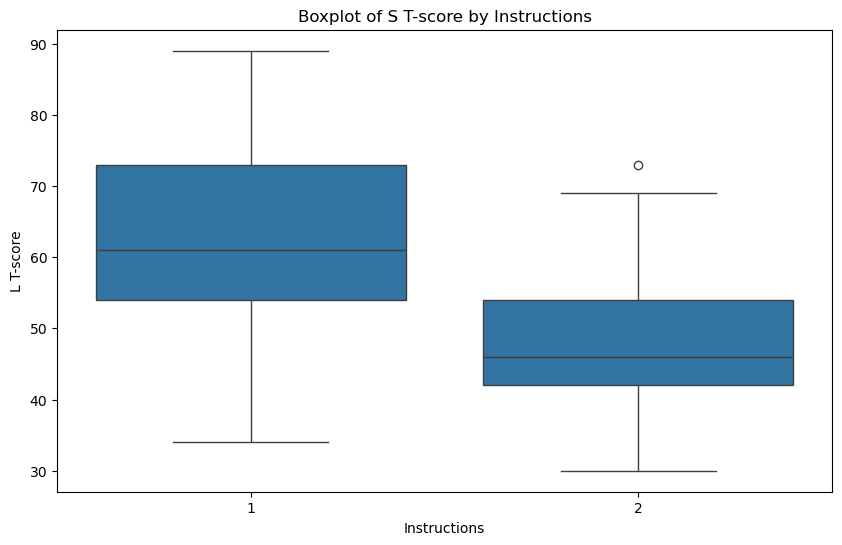

In [34]:
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Instructions', y='L T-score', data=df_T_score)
# plt.title("Boxplot of S T-score by Instructions")
# plt.show()

In [179]:
df = df.drop(['Subject number','Time Pressure'],axis=1)

In [180]:
df.columns

Index(['S T-score', 'S_RT ', 'S_MD ', 'S_AUC ', 'S_MD_time ', 'S_vel X ',
       'S_vel Y ', 'K T-score', 'K_RT ', 'K_MD ', 'K_AUC ', 'K_MD_time ',
       'K_vel X ', 'K_vel Y ', 'L T-score', 'L_RT ', 'L_MD ', 'L_AUC ',
       'L_MD_time ', 'L_vel X ', 'L_vel Y', 'VR T-score', 'VR_RT ', 'VR_MD',
       'VR_AUC', 'VR_MD_time ', 'VR_vel X', 'VR_vel Y', 'Instructions'],
      dtype='object')

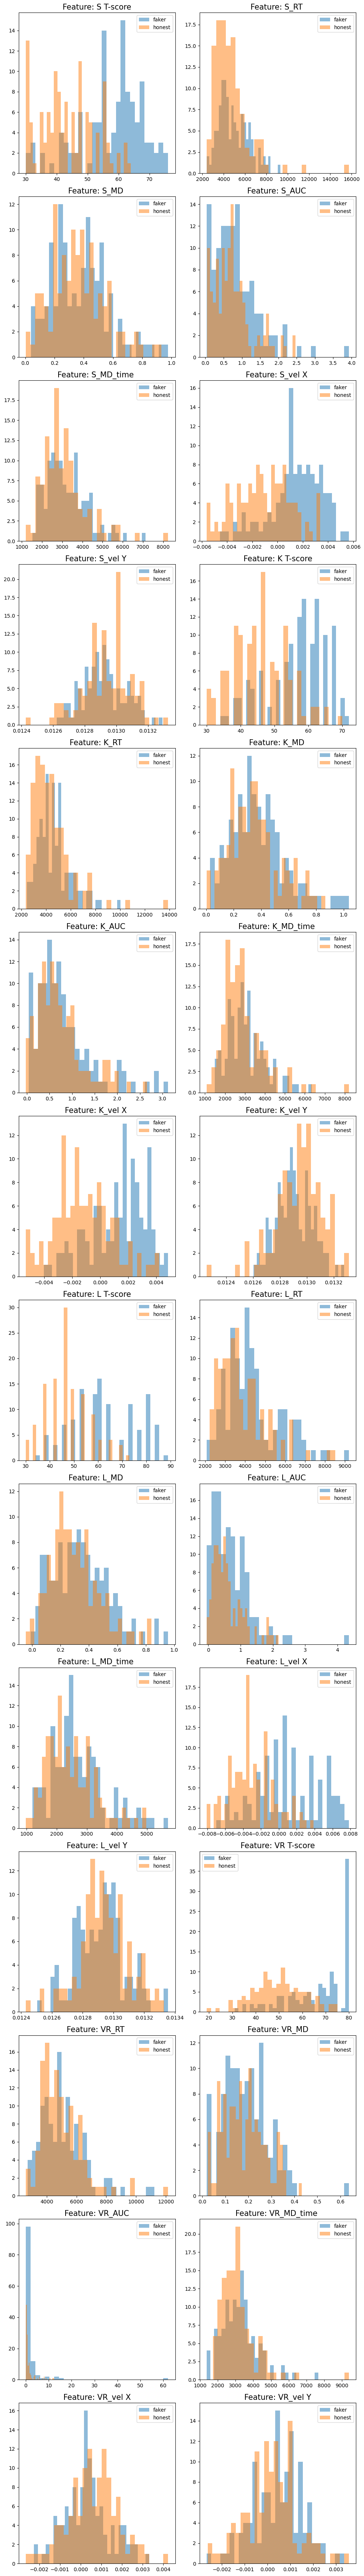

In [181]:
# 설명변수명 리스트 (정확하게 열 이름만 필터링)
feature_name = ['S T-score', 'S_RT ', 'S_MD ', 'S_AUC ', 'S_MD_time ', 'S_vel X ',
       'S_vel Y ', 'K T-score', 'K_RT ', 'K_MD ', 'K_AUC ', 'K_MD_time ',
       'K_vel X ', 'K_vel Y ', 'L T-score', 'L_RT ', 'L_MD ', 'L_AUC ',
       'L_MD_time ', 'L_vel X ', 'L_vel Y', 'VR T-score', 'VR_RT ', 'VR_MD',
       'VR_AUC', 'VR_MD_time ', 'VR_vel X', 'VR_vel Y']

# 서브플롯 배열 설정
num_plots = len(feature_name)
num_cols = 2  
num_rows = math.ceil(num_plots / num_cols)  # 동적으로 행의 수 결정

plt.figure(figsize=(10, num_rows * 5))  # 동적 크기 설정
for col_idx in range(len(feature_name)):
    # 동적으로 서브플롯 설정
    plt.subplot(num_rows, num_cols, col_idx + 1)
    # faker 데이터 히스토그램
    plt.hist(df[df["Instructions"] == '1'][feature_name[col_idx]], bins=30, label="faker", alpha=0.5)
    # honest 데이터 히스토그램
    plt.hist(df[df["Instructions"] == '2'][feature_name[col_idx]], bins=30, label="honest", alpha=0.5)
    plt.legend()
    # 그래프 타이틀
    plt.title("Feature: " + feature_name[col_idx], fontsize=15)

plt.tight_layout()
plt.show()


In [12]:
df = df.drop(['Subject number','Time Pressure'],axis=1)

In [182]:
import pickle
from sklearn.preprocessing import StandardScaler

# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()

# 설명변수 및 목표변수 분리
x = df[df.columns.difference(['Instructions'])]
y = df['Instructions']

# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

# 스케일러 저장
scaler_path = 'C:/Users/user/Desktop/패널/'
scaler_filename = 'scaler.pkl'
with open(scaler_path + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"스케일러 저장 완료! 파일 경로: {scaler_path + scaler_filename}")

스케일러 저장 완료! 파일 경로: C:/Users/user/Desktop/패널/scaler.pkl


In [183]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size = 0.3, random_state = 10)

In [184]:
x_train.dtype

dtype('float64')

In [185]:
y_train.value_counts(normalize=True)

Instructions
1    0.505952
2    0.494048
Name: proportion, dtype: float64

In [186]:
def modeling_uncustomized(algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=10)
    uncustomized.fit(x_train, y_train)
    
    # Train Data 설명력
    train_score_before = round(uncustomized.score(x_train, y_train), 3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    
    # Test Data 설명력
    test_score_before = round(uncustomized.score(x_test, y_test), 3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    
    return train_score_before, test_score_before


In [187]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('C:/Users/user/Desktop/패널/figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

In [188]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=10)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [189]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=10)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=10)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [190]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 10)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 10)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [191]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=10)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=10)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

In [192]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [193]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=10, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 10, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = 'C:/Users/user/Desktop/패널/'
    model_filename = 'panel_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred, pos_label='2'):.3f}")  # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred, pos_label='2'):.3f}")        # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred, pos_label='2'):.3f}") 
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    cm_display = ConfusionMatrixDisplay.from_estimator(model,x_test,y_test,display_labels=['faker', 'honest'], cmap='Pastel1',include_values=True)  # 값을 혼동행렬에 표시
    plt.savefig('C:/Users/user/Desktop/패널/figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    plt.savefig('C:/Users/user/Desktop/패널/figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

        # ROC 커브 계산을 위해 예측 확률값 가져오기 (양성 클래스에 대한 확률값)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    
    # ROC 커브 계산
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='2')
    roc_auc = auc(fpr, tpr)
    
    # ROC 커브 시각화
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{algorithm_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig('C:/Users/user/Desktop/패널/figure/' + algorithm_name + '_roc_curve.png') # ROC 그래프 저장
    plt.show()

In [194]:
algorithm = RFC
algorithm_name = 'rfc'

In [195]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.833


    n_estimators  TrainScore  TestScore
0              5      0.9940     0.8194
1             10      0.9821     0.8194
2             15      0.9940     0.8194
3             20      1.0000     0.8194
4             25      1.0000     0.8333
5             30      0.9940     0.8472
6             35      1.0000     0.8472
7             40      1.0000     0.8472
8             45      1.0000     0.8472
9             50      1.0000     0.8472
10            55      1.0000     0.8472
11            60      1.0000     0.8194
12            65      1.0000     0.8333
13            70      1.0000     0.8472
14            75      1.0000     0.8472
15            80      1.0000     0.8472
16            85      1.0000     0.8194
17            90      1.0000     0.8333
18            95      1.0000     0.8194
19           100      1.0000     0.8333
20           105      1.0000     0.8194
21           110      1.0000     0.8194
22           115      1.0000     0.8194
23           120      1.0000     0.8194


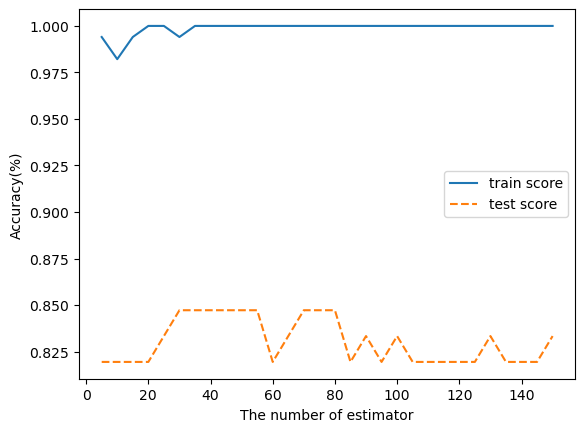

In [196]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [197]:
n_estimator = 30

    depth  TrainScore  TestScore
0       1      0.8274     0.8333
1       2      0.8333     0.8333
2       3      0.8631     0.8472
3       4      0.8929     0.8333
4       5      0.9524     0.8472
5       6      0.9940     0.8194
6       7      1.0000     0.8472
7       8      0.9940     0.8472
8       9      0.9940     0.8472
9      10      0.9940     0.8472
10     11      0.9940     0.8472
11     12      0.9940     0.8472
12     13      0.9940     0.8472
13     14      0.9940     0.8472
14     15      0.9940     0.8472
15     16      0.9940     0.8472
16     17      0.9940     0.8472
17     18      0.9940     0.8472
18     19      0.9940     0.8472
19     20      0.9940     0.8472


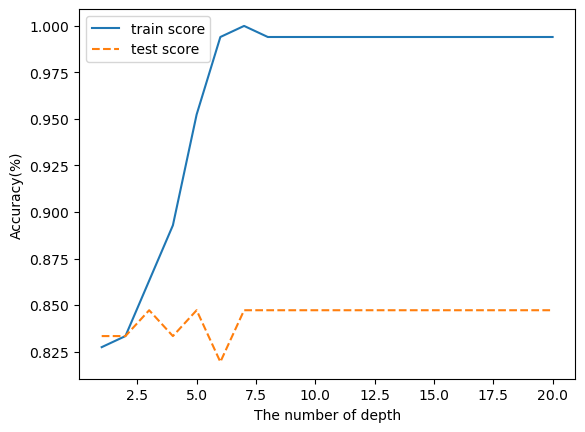

In [198]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [199]:
n_depth = 3

    min_samples_split  TrainScore  TestScore
0                   2      0.8631     0.8472
1                   4      0.8631     0.8472
2                   6      0.8571     0.8333
3                   8      0.8571     0.8472
4                  10      0.8571     0.8472
5                  12      0.8571     0.8472
6                  14      0.8571     0.8472
7                  16      0.8512     0.8333
8                  18      0.8512     0.8472
9                  20      0.8452     0.8333
10                 22      0.8512     0.8194
11                 24      0.8512     0.8194
12                 26      0.8393     0.8194
13                 28      0.8452     0.8194
14                 30      0.8512     0.8333
15                 32      0.8333     0.8333
16                 34      0.8274     0.8333
17                 36      0.8333     0.8333
18                 38      0.8333     0.8333
19                 40      0.8274     0.8333
20                 42      0.8274     0.8333
21        

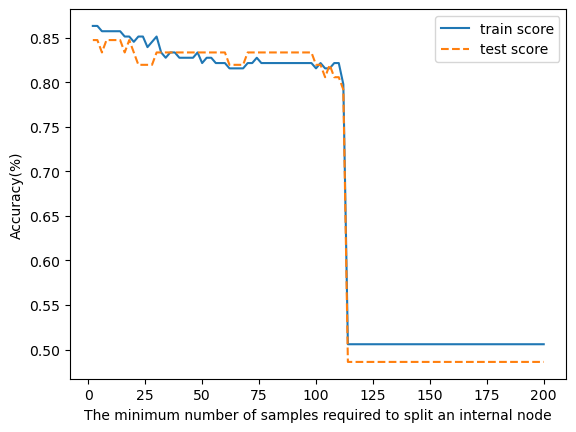

In [200]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [201]:
n_split = 8

    min_samples_leaf  TrainScore  TestScore
0                  2      0.8512     0.8333
1                  4      0.8571     0.8333
2                  6      0.8452     0.8194
3                  8      0.8274     0.8194
4                 10      0.8274     0.8333
5                 12      0.8274     0.8333
6                 14      0.8155     0.8333
7                 16      0.8214     0.8333
8                 18      0.8214     0.8333
9                 20      0.8214     0.8333
10                22      0.8214     0.8333
11                24      0.8274     0.8333
12                26      0.8274     0.8333
13                28      0.8274     0.8333
14                30      0.8274     0.8333
15                32      0.8214     0.8333
16                34      0.8214     0.8333
17                36      0.8214     0.8333
18                38      0.8155     0.8333
19                40      0.8155     0.8333
20                42      0.8036     0.8056
21                44      0.8095

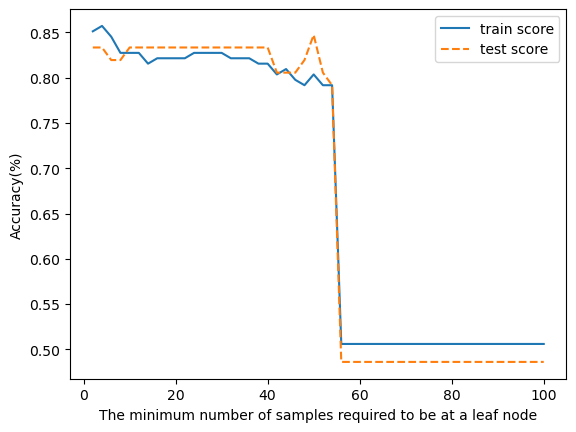

In [202]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [203]:
n_leaf = 50

최종 모델 저장 완료! 파일 경로: C:/Users/user/Desktop/패널/panel_rfc.pkl

Accuracy: 0.806
Precision: 0.829
Recall: 0.784
F1-score: 0.806


<Figure size 3000x3000 with 0 Axes>

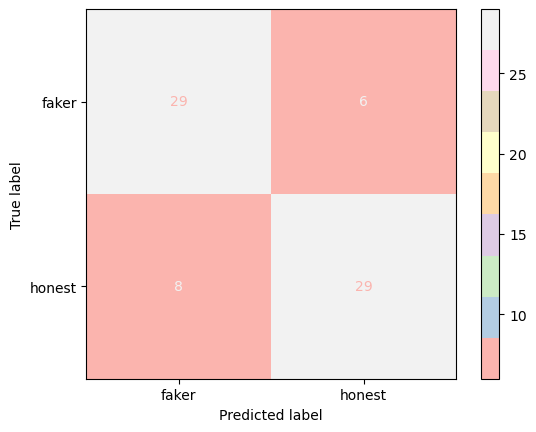

        Feature  Importance
12     K_vel X        0.241
14    L T-score       0.138
3        S_AUC        0.103
21   VR T-score       0.103
26     VR_vel X       0.069
6      S_vel Y        0.069
11   K_MD_time        0.034
24       VR_AUC       0.034
22       VR_RT        0.034
19     L_vel X        0.034
1         S_RT        0.034
0     S T-score       0.034
9         K_MD        0.034
5      S_vel X        0.034
10       K_AUC        0.000
13     K_vel Y        0.000
15        L_RT        0.000
16        L_MD        0.000
17       L_AUC        0.000
18   L_MD_time        0.000
8         K_RT        0.000
20      L_vel Y       0.000
7     K T-score       0.000
23        VR_MD       0.000
4    S_MD_time        0.000
25  VR_MD_time        0.000
2         S_MD        0.000
27     VR_vel Y       0.000


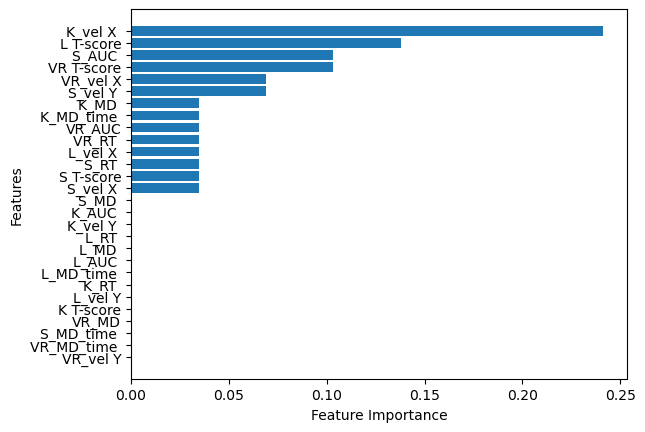

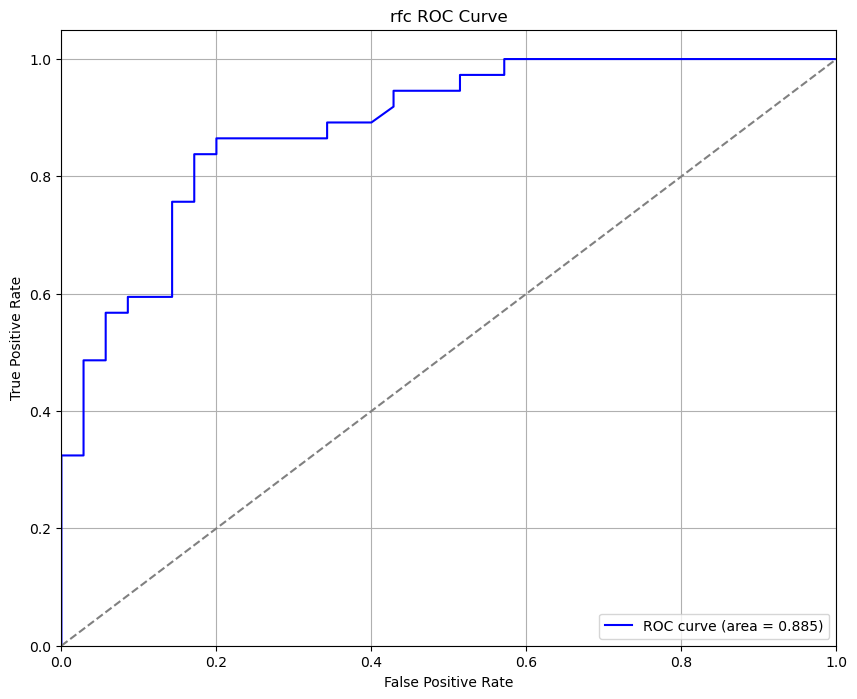

In [204]:
model_final(algorithm, algorithm_name, feature_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일러 생성 및 학습
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 스케일러 저장
scaler_path = "C:/Users/user/Desktop/패널/scaler.pkl"
with open(scaler_path, 'wb') as file:
    pickle.dump(scaler, file)

1. H vs F 변수 t 검증

In [7]:
from scipy import stats

# 그룹별 데이터 나누기
faker_group = df_VR[df_VR['Instructions'] == 'faker']
honest_group = df_VR[df_VR['Instructions'] == 'honest']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['VRT-score', 'VR_RT', 'VR_MD', 'VR_AUC', 'VR_MD_time', 'VR_velX', 'VR_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    faker_normality = stats.shapiro(faker_group[var])[1]
    honest_normality = stats.shapiro(honest_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(faker_group[var], honest_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
    
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


VRT-score: t-statistic = 10.814, p-value = 0.0 ***
VR_RT: t-statistic = 0.791, p-value = 0.43 ns
VR_MD: t-statistic = 0.772, p-value = 0.441 ns
VR_AUC: t-statistic = 0.936, p-value = 0.351 ns
VR_MD_time: t-statistic = 0.964, p-value = 0.336 ns
VR_velX: t-statistic = -1.877, p-value = 0.062 ns
VR_velY: t-statistic = 2.313, p-value = 0.022 *


In [8]:
from scipy import stats

# 그룹별 데이터 나누기
faker_group = df_L[df_L['Instructions'] == 'faker']
honest_group = df_L[df_L['Instructions'] == 'honest']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['LT-score', 'L_RT', 'L_MD', 'L_AUC', 'L_MD_time', 'L_velX', 'L_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    faker_normality = stats.shapiro(faker_group[var])[1]
    honest_normality = stats.shapiro(honest_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(faker_group[var], honest_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
     
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


LT-score: t-statistic = 10.545, p-value = 0.0 ***
L_RT: t-statistic = 3.191, p-value = 0.002 **
L_MD: t-statistic = 1.744, p-value = 0.083 ns
L_AUC: t-statistic = 1.619, p-value = 0.107 ns
L_MD_time: t-statistic = 2.573, p-value = 0.011 *
L_velX: t-statistic = 10.539, p-value = 0.0 ***
L_velY: t-statistic = -1.233, p-value = 0.219 ns


In [9]:
from scipy import stats

# 그룹별 데이터 나누기
faker_group = df_S[df_S['Instructions'] == 'faker']
honest_group = df_S[df_S['Instructions'] == 'honest']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['ST-score', 'S_RT', 'S_MD', 'S_AUC', 'S_MD_time', 'S_velX', 'S_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    faker_normality = stats.shapiro(faker_group[var])[1]
    honest_normality = stats.shapiro(honest_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(faker_group[var], honest_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
     
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


ST-score: t-statistic = 11.197, p-value = 0.0 ***
S_RT: t-statistic = 1.141, p-value = 0.255 ns
S_MD: t-statistic = 0.801, p-value = 0.424 ns
S_AUC: t-statistic = 0.914, p-value = 0.361 ns
S_MD_time: t-statistic = 0.98, p-value = 0.328 ns
S_velX: t-statistic = 9.597, p-value = 0.0 ***
S_velY: t-statistic = -0.995, p-value = 0.321 ns


In [9]:
from scipy import stats

# 그룹별 데이터 나누기
faker_group = df_K[df_K['Instructions'] == 'faker']
honest_group = df_K[df_K['Instructions'] == 'honest']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['KT-score', 'K_RT', 'K_MD', 'K_AUC', 'K_MD_time', 'K_velX', 'K_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    faker_normality = stats.shapiro(faker_group[var])[1]
    honest_normality = stats.shapiro(honest_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(faker_group[var], honest_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
     
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


KT-score: t-statistic = 10.028, p-value = 0.0 ***
K_RT: t-statistic = 1.411, p-value = 0.16 ns
K_MD: t-statistic = 1.269, p-value = 0.206 ns
K_AUC: t-statistic = 0.993, p-value = 0.322 ns
K_MD_time: t-statistic = 1.342, p-value = 0.181 ns
K_velX: t-statistic = 9.365, p-value = 0.0 ***
K_velY: t-statistic = -1.734, p-value = 0.084 ns


2. 시간 압박으로 나눈 t 검증

In [11]:
from scipy import stats

# 그룹별 데이터 나누기
press_group = df_VR[df_VR['TimePressure'] == 'yes']
notpress_group = df_VR[df_VR['TimePressure'] == 'no']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['VRT-score', 'VR_RT', 'VR_MD', 'VR_AUC', 'VR_MD_time', 'VR_velX', 'VR_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    press_normality = stats.shapiro(press_group[var])[1]
    notpress_normality = stats.shapiro(notpress_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(press_group[var], notpress_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
    
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


VRT-score: t-statistic = 0.585, p-value = 0.559 ns
VR_RT: t-statistic = -3.763, p-value = 0.0 ***
VR_MD: t-statistic = -1.212, p-value = 0.227 ns
VR_AUC: t-statistic = -1.392, p-value = 0.166 ns
VR_MD_time: t-statistic = -2.504, p-value = 0.013 *
VR_velX: t-statistic = -1.177, p-value = 0.24 ns
VR_velY: t-statistic = 1.391, p-value = 0.166 ns


In [12]:
from scipy import stats

# 그룹별 데이터 나누기
press_group = df_S[df_S['TimePressure'] == 'yes']
notpress_group = df_S[df_S['TimePressure'] == 'no']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['ST-score', 'S_RT', 'S_MD', 'S_AUC', 'S_MD_time', 'S_velX', 'S_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    press_normality = stats.shapiro(press_group[var])[1]
    notpress_normality = stats.shapiro(notpress_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(press_group[var], notpress_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
    
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


ST-score: t-statistic = -0.423, p-value = 0.672 ns
S_RT: t-statistic = -4.797, p-value = 0.0 ***
S_MD: t-statistic = 3.296, p-value = 0.001 ***
S_AUC: t-statistic = 2.523, p-value = 0.012 *
S_MD_time: t-statistic = -4.876, p-value = 0.0 ***
S_velX: t-statistic = -0.002, p-value = 0.998 ns
S_velY: t-statistic = 0.84, p-value = 0.402 ns


In [13]:
from scipy import stats

# 그룹별 데이터 나누기
press_group = df_L[df_L['TimePressure'] == 'yes']
notpress_group = df_L[df_L['TimePressure'] == 'no']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['LT-score', 'L_RT', 'L_MD', 'L_AUC', 'L_MD_time', 'L_velX', 'L_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    press_normality = stats.shapiro(press_group[var])[1]
    notpress_normality = stats.shapiro(notpress_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(press_group[var], notpress_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
    
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


LT-score: t-statistic = 0.903, p-value = 0.367 ns
L_RT: t-statistic = -5.447, p-value = 0.0 ***
L_MD: t-statistic = 3.575, p-value = 0.0 ***
L_AUC: t-statistic = 2.166, p-value = 0.031 *
L_MD_time: t-statistic = -4.79, p-value = 0.0 ***
L_velX: t-statistic = 0.794, p-value = 0.428 ns
L_velY: t-statistic = 0.479, p-value = 0.633 ns


In [14]:
from scipy import stats

# 그룹별 데이터 나누기
press_group = df_K[df_K['TimePressure'] == 'yes']
notpress_group = df_K[df_K['TimePressure'] == 'no']

# 통계 검정 결과 저장할 딕셔너리 생성
results = {}

# 검정할 연속형 변수들
variables = ['KT-score', 'K_RT', 'K_MD', 'K_AUC', 'K_MD_time', 'K_velX', 'K_velY']

for var in variables:
    # 정규성 검정 (Shapiro-Wilk Test)
    press_normality = stats.shapiro(press_group[var])[1]
    notpress_normality = stats.shapiro(notpress_group[var])[1]
    
    
    t_stat, p_value = stats.ttest_ind(press_group[var], notpress_group[var], equal_var=False)
    results[var] = {'t_stat': round(t_stat,3), 'p_value': round(p_value, 3), 'normality_passed': True}
    
# p-value에 따른 별 표시 함수
def significance_stars(p_value):
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    else:
        return 'ns'

# 결과 출력
for var, res in results.items():
    if res['normality_passed']:
        stars = significance_stars(res['p_value'])
        print(f"{var}: t-statistic = {res['t_stat']}, p-value = {res['p_value']} {stars}")
    else:
        stars = significance_stars(res['p_value'])
        print(f"{var}: U-statistic = {res['u_stat']}, p-value = {res['p_value']} {stars}")


KT-score: t-statistic = 0.445, p-value = 0.656 ns
K_RT: t-statistic = -5.195, p-value = 0.0 ***
K_MD: t-statistic = 2.853, p-value = 0.005 **
K_AUC: t-statistic = 1.879, p-value = 0.061 ns
K_MD_time: t-statistic = -5.447, p-value = 0.0 ***
K_velX: t-statistic = 0.464, p-value = 0.643 ns
K_velY: t-statistic = 1.431, p-value = 0.154 ns
